# Conversion Rate Challenge
## Data Science Directed Study
### michelle.carney@berkeley.edu

We have data about users who hit our site: whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are repeated users and the number of pages visited during that session (as a proxy for site activity/time spent on the site).

Your project is to:
 - Predict Conversion Rate (# conversions / total sessions)
 - Come up with recommendations for the product team and the marketing team to improve the conversion rate
 
 
Columns:

- country : user country based on the IP address

- age : user age. Self-reported at sign-in step

- new_user : whether the user created the account during this session or had already an account and simply came back to the site

- source : marketing channel source

  - Ads: came to the site by clicking on an advertisement
  - Seo: came to the site by clicking on search results
  - Direct: came to the site by directly typing the URL on the browser

- total_pages_visited: number of total pages visited during the session. This is a proxy for time spent on site and engagement during the session.

- converted: this is our label. 1 means they converted within the session, 0 means they left without buying anything. The company goal is to increase conversion rate: # conversions / total sessions.

In [82]:
# Let's start with our imports

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

ERROR! Session/line number was not unique in database. History logging moved to new session 150


In [83]:
# Let's load the data and investigate in pandas

df = pd.read_csv("conversion_data.csv")
df.tail()
# len(df)

,country,age,new_user,source,total_pages_visited,converted
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0
316199,UK,24,0,Ads,4,0


We can see that there are 316200 rows, or 316199 individual entries

Let's look at each individual category (column) for summary stats

In [84]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


First thing to me that stands out is that the max age is 123 - I think there might be something wrong with the data, which is not great.

The average number of pages viewed was about 5 pages per visit +/- 3 pages.

The "mean new_user" could be looked at as 0.685 - or 69% probability that the user is a new user, +/- 0.46. There are more new users than returning users, which is good since we are looking to increase the conversion rate.

Out of the converted, it looks like the current conversion score is 0.03 or 3% - or the number of conversions divided by the total view. It would be interesting to see what the industry standard is for this type of site. This needs to be investigated more to remove the returning users.

In [85]:
agedf = df.sort('age')
agedf.tail()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,country,age,new_user,source,total_pages_visited,converted
154217,US,73,1,Seo,5,0
192644,US,77,0,Direct,4,0
265167,US,79,1,Direct,1,0
295581,UK,111,0,Ads,10,1
90928,Germany,123,0,Seo,15,1


IT seems a little weird to have a 111 and 123 year old surfing the web. Let's remove them.

In [98]:
df = agedf[:-2] #remove the 111 and 123 yo
df.tail()

,country,age,new_user,source,total_pages_visited,converted
114485,US,70,1,Ads,9,0
208969,US,72,1,Direct,4,0
154217,US,73,1,Seo,5,0
192644,US,77,0,Direct,4,0
265167,US,79,1,Direct,1,0


In [99]:
df.country.value_counts()


US         178092
China       76602
UK          48449
Germany     13055
Name: country, dtype: int64

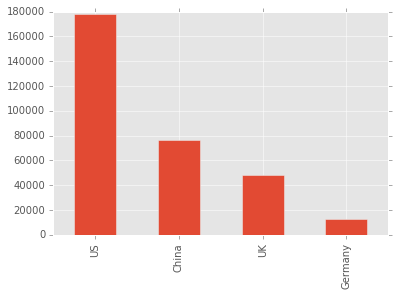

In [100]:
df.country.value_counts().plot(kind='bar')

# df['country']

It looks like the majority of the traffic is coming from the US, with China and UK also making up a small portion. There are only four types of "country" - US, China, UK, Germany

In [89]:
df.source.value_counts()


Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

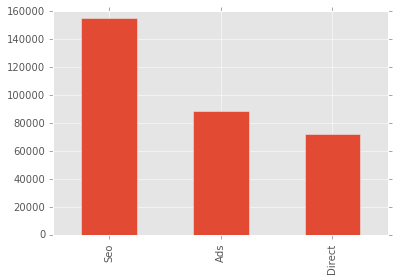

In [90]:
df.source.value_counts().plot(kind='bar')

Similarly, there are only 3 types of "source" categorical var - SEO, Ads, and direct. The majority of traffic comes from source

### Let's look at the the conversion rate by country

In [91]:
grouped_df = df.groupby('country')

In [92]:
grouped_df.describe()

age      converted       new_user  \
country                                                      
China   count   76602.000000   76602.000000   76602.000000   
        mean       30.672972       0.001332       0.698520   
        std         8.283862       0.036466       0.458904   
        min        17.000000       0.000000       0.000000   
        25%        24.000000       0.000000       0.000000   
        50%        30.000000       0.000000       1.000000   
        75%        36.000000       0.000000       1.000000   
        max        69.000000       1.000000       1.000000   
Germany count   13056.000000   13056.000000   13056.000000   
        mean       30.449985       0.062500       0.677237   
        std         8.289022       0.242071       0.467551   
        min        17.000000       0.000000       0.000000   
        25%        24.000000       0.000000       0.000000   
        50%        30.000000       0.000000       1.000000   
        75%        36.000000       0.000000       1.000000   
        max       123.000000       1.000000       1.000000   
UK      count   48450.000000   48450.000000   48450.000000   
        mean       30.451538       0.052632       0.679835   
        std         8.244991       0.223299       0.466545   
        min        17.000000       0.000000       0.000000   
        25%        24.000000       0.000000       0.000000   
        50%        30.000000       0.000000       1.000000   
        75%        36.000000       0.000000       1.000000   
        max       111.000000       1.000000       1.000000   
US      count  178092.000000  178092.000000  178092.000000   
        mean       30.566482       0.037801       0.681985   
        std         8.272128       0.190714       0.465707   
        min        17.000000       0.000000       0.000000   
        25%        24.000000       0.000000       0.000000   
        50%        30.000000       0.000000       1.000000   
        75%        36.000000       0.000000       1.000000   
        max        79.000000       1.000000       1.000000   

               total_pages_visited  
country                             
China   count         76602.000000  
        mean              4.553523  
        std               2.804987  
        min               1.000000  
        25%               2.000000  
        50%               4.000000  
        75%               6.000000  
        max              26.000000  
Germany count         13056.000000  
        mean              5.190717  
        std               3.762899  
        min               1.000000  
        25%               2.000000  
        50%               4.000000  
        75%               7.000000  
        max              27.000000  
UK      count         48450.000000  
        mean              5.082167  
        std               3.630763  
        min               1.000000  
        25%               2.000000  
        50%               4.000000  
        75%               7.000000  
        max              27.000000  
US      count        178092.000000  
        mean              4.930160  
        std               3.427085  
        min               1.000000  
        25%               2.000000  
        50%               4.000000  
        75%               7.000000  
        max              29.000000

In [93]:
means = grouped_df.mean()

In [94]:
means

,age,new_user,total_pages_visited,converted
country,,,,
China,30.672972,0.698520,4.553523,0.001332
Germany,30.449985,0.677237,5.190717,0.062500
UK,30.451538,0.679835,5.082167,0.052632
US,30.566482,0.681985,4.930160,0.037801


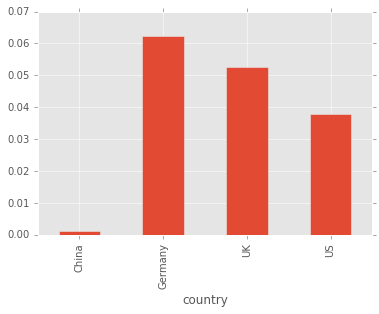

In [96]:
means.converted.plot(kind='bar')

There are virtually no conversions from China, but a lot more from Germany! That's useful to know for making a model

## What about grouping by total pages visited? is that useful?

In [104]:
grouped_df2 = df.groupby('total_pages_visited')
grouped_df2.describe()

age     converted      new_user
total_pages_visited                                                
1                   count  40739.000000  40739.000000  40739.000000
                    mean      30.711701      0.000000      0.703601
                    std        8.262934      0.000000      0.456675
                    min       17.000000      0.000000      0.000000
                    25%       24.000000      0.000000      0.000000
                    50%       30.000000      0.000000      1.000000
                    75%       36.000000      0.000000      1.000000
                    max       79.000000      0.000000      1.000000
2                   count  43868.000000  43868.000000  43868.000000
                    mean      30.701673      0.000228      0.699188
                    std        8.300869      0.015097      0.458616
                    min       17.000000      0.000000      0.000000
                    25%       24.000000      0.000000      0.000000
                    50%       30.000000      0.000000      1.000000
                    75%       36.000000      0.000000      1.000000
                    max       68.000000      1.000000      1.000000
3                   count  43829.000000  43829.000000  43829.000000
                    mean      30.690251      0.000251      0.699035
                    std        8.246243      0.015840      0.458683
                    min       17.000000      0.000000      0.000000
                    25%       24.000000      0.000000      0.000000
                    50%       30.000000      0.000000      1.000000
                    75%       36.000000      0.000000      1.000000
                    max       67.000000      1.000000      1.000000
4                   count  41046.000000  41046.000000  41046.000000
                    mean      30.729572      0.000780      0.696730
                    std        8.299196      0.027911      0.459676
                    min       17.000000      0.000000      0.000000
                    25%       24.000000      0.000000      0.000000
                    50%       30.000000      0.000000      1.000000
...                                 ...           ...           ...
26                  std        6.520330      0.000000      0.492592
                    min       17.000000      1.000000      0.000000
                    25%       21.000000      1.000000      0.000000
                    50%       24.000000      1.000000      0.000000
                    75%       29.000000      1.000000      1.000000
                    max       39.000000      1.000000      1.000000
27                  count      7.000000      7.000000      7.000000
                    mean      22.571429      1.000000      0.428571
                    std        3.207135      0.000000      0.534522
                    min       17.000000      1.000000      0.000000
                    25%       21.500000      1.000000      0.000000
                    50%       22.000000      1.000000      0.000000
                    75%       24.500000      1.000000      1.000000
                    max       27.000000      1.000000      1.000000
28                  count      1.000000      1.000000      1.000000
                    mean      17.000000      1.000000      1.000000
                    std             NaN           NaN           NaN
                    min       17.000000      1.000000      1.000000
                    25%       17.000000      1.000000      1.000000
                    50%       17.000000      1.000000      1.000000
                    75%       17.000000      1.000000      1.000000
                    max       17.000000      1.000000      1.000000
29                  count      2.000000      2.000000      2.000000
                    mean      32.000000      1.000000      0.000000
                    std        1.414214      0.000000      0.000000
                    min       31.000000      1.000000      0.000000
                    25% 

In [107]:
means = grouped_df2.mean()

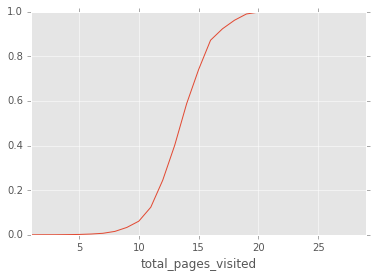

In [110]:
means.converted.plot(kind='line')

So the more pages visited, the more likely they are to convert. Let's use this to inform the model

# Machine Learning

In [119]:
df.dtypes

country                  object
age                       int64
new_user                  int64
source                   object
total_pages_visited       int64
converted              category
dtype: object

Since we are trying to predict converted, we want this to be a categorical data type, not an int64

In [117]:
df.converted = df.converted.astype("category", categories=[0,1], ordered=False)

//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [121]:
df.new_user = df.new_user.astype("category", categories=[0,1], ordered=False)

//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [122]:
df.dtypes

country                  object
age                       int64
new_user               category
source                   object
total_pages_visited       int64
converted              category
dtype: object

Let's create a training set and dev set

In [125]:
random_index = np.random.permutation(df.index)
random_index[:10]
df.ix[random_index, ['country', 'age', 'new_user', 'source', 'total_pages_visited', 'converted']][:5]
df_shuffled = df.ix[random_index, ['country', 'age', 'new_user', 'source', 'total_pages_visited', 'converted']]
df_shuffled.reset_index(drop=True, inplace=True)

In [135]:
rows, columns = df_shuffled.shape
print("Rows:", rows)
print("Columns:", columns)
train_size = round(rows*.7)
test_size   = round(rows*.3)
df_train = df_shuffled.loc[:train_size]
df_train.shape
df_test = df_shuffled.loc[train_size:].reset_index(drop=True)
df_test.shape

Rows: 316198
Columns: 6


(94859, 6)

In [142]:
df_test.shape[0]/df_shuffled.shape[0]

0.2999987349698607

In [141]:
df_train.shape[0]/df_shuffled.shape[0]

0.7000044276054878

0.2999987349698607